In [1]:
import tensorflow as tf
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

We begin by loading in our data. We then plot some example points.

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

3


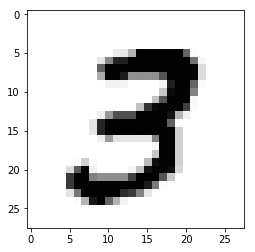

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index=7
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

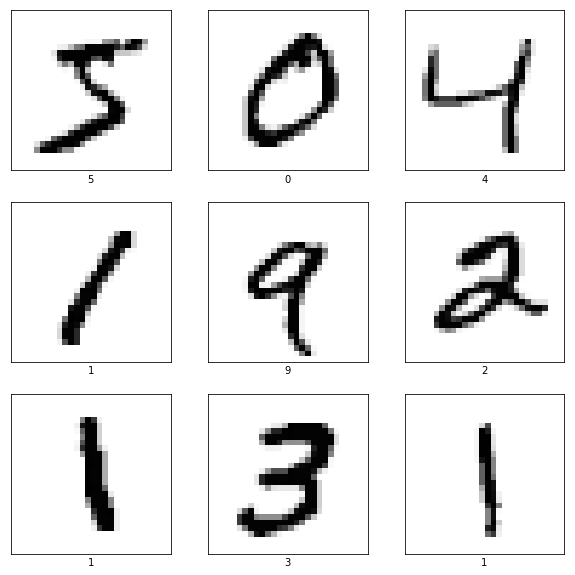

In [5]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='Greys')
    plt.xlabel(y_train[i])
plt.show()

What's actually in each of these x_train data points? Pixels! Pixels range in value from 0 to 255, where 0 represents white and 255 represents black. 

![remote sensing](images.png)

In [6]:
print(x_train[image_index][15][15])

253


We squash these values down to the range [0, 1] by dividing by 255.

In [7]:
x_train, x_test=x_train/255, x_test/255

We are now ready to build our model! To do this, we'll build it in three steps, with only one hidden layer.

In [44]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.sigmoid),
    keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

![neural network](goal.png)

Essentially, our model is performing the computation $\bar{h}=\sigma(W^t \bar{x}+\bar{b})$ in the first layer, where $W$ is a $784\times 15$ weight matrix, and $\bar{b}$ is a $15\times 1$ bias vector. This accounts for a $11760+15=11775$ parameters. In the second layer, we have $\bar{o}=\text{softmax}(\tilde{W} \bar{h}+\tilde{b})$, where $\tilde{W}$ is a $10\times 15$ weight matrix, and $\tilde{b}$ is a $10\times 1$ bias vector. This accounts for $150+10=160$ parameters. We can summarize this below.

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                170       
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
_________________________________________________________________


We perform one hot encoding to compare our model's results to the expected one:

In [10]:
y_test=keras.utils.to_categorical(y_test, num_classes=10)
y_train=keras.utils.to_categorical(y_train, num_classes=10)

We're now ready to compile the model! To do this, we need three parameters (taken from [TensorFlow Tutorials](https://www.tensorflow.org/tutorials/keras/basic_classification)):
* Loss function: This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* Optimizer: This is how the model is updated based on the data it sees and its loss function.
* Metrics: Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [45]:
model.compile(loss=tf.losses.log_loss,
              optimizer='adam',
              metrics=['accuracy'])

Let's breakdown what these mean one step at a time. 

In [48]:
model.fit(x_train, y_train, epochs=30, batch_size=600)

Epoch 1/30
60000/60000 [==============================] - 1s 23us/step - loss: 0.0234 - acc: 0.9748
Epoch 2/30
60000/60000 [==============================] - 1s 22us/step - loss: 0.0208 - acc: 0.9773
Epoch 3/30
60000/60000 [==============================] - 1s 22us/step - loss: 0.0188 - acc: 0.9786
Epoch 4/30
60000/60000 [==============================] - 1s 23us/step - loss: 0.0173 - acc: 0.9800
Epoch 5/30
60000/60000 [==============================] - 1s 22us/step - loss: 0.0158 - acc: 0.9808
Epoch 6/30
60000/60000 [==============================] - 1s 22us/step - loss: 0.0145 - acc: 0.9827
Epoch 7/30
60000/60000 [==============================] - 1s 22us/step - loss: 0.0137 - acc: 0.9833
Epoch 8/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.0131 - acc: 0.9835
Epoch 9/30
60000/60000 [==============================] - 1s 23us/step - loss: 0.0119 - acc: 0.9853
Epoch 10/30
60000/60000 [==============================] - 1s 22us/step - loss: 0.0114 - acc: 0.9859

In [49]:
test_loss, test_accuracy=model.evaluate(x_test, y_test)
print('Test Accuracy', test_accuracy)

10000/10000 [==============================] - 0s 30us/step
Test Accuracy 0.9794


In [32]:
predictions=model.predict(x_test)

In [16]:
predictions[0]

array([4.0803711e-06, 1.2623361e-05, 3.7676495e-04, 2.6619760e-04,
       2.0426028e-06, 9.9811354e-05, 7.5624349e-08, 9.9869448e-01,
       3.3272418e-06, 5.4059207e-04], dtype=float32)

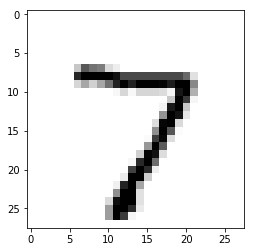

In [17]:
plt.imshow(x_test[0], cmap='Greys')

In [18]:
import numpy as np

In [19]:
np.argmax(predictions[0])

7

In [20]:
def right_or_wrong(i, predictions, true_labels):
    '''Returns whether a prediction is right or wrong'''
    prediction=np.argmax(predictions[i])
    true_label=np.argmax(true_labels[i])
    return true_label==prediction

In [21]:
def plot_image(i, predictions, true_labels, img):
    prediction, true_label, img=predictions[i], true_labels[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap='Greys')
    
    predicted_label=np.argmax(prediction)
    true_label=np.argmax(true_label)
    
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label, 100*np.max(prediction), true_label, color=color))
        

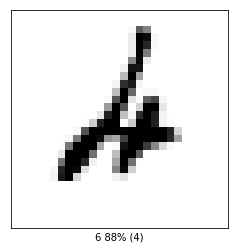

In [36]:
for i in range(200, 1200):
    if not right_or_wrong(i, predictions, y_test):
        plot_image(i, predictions, y_test, x_test)
        break
        

In [105]:
img=x_test[0]
img = (np.expand_dims(img,0))
predictions_single = model.predict(img)
print(predictions_single)

[[4.1903887e-04 4.6286135e-05 1.3694421e-03 1.8491673e-04 2.5035249e-04
  2.0312375e-05 2.3137871e-05 9.9619353e-01 1.7122124e-04 1.3217767e-03]]


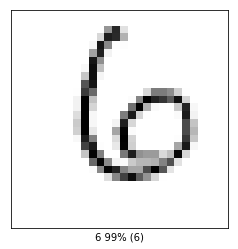

In [25]:
plot_image(100, predictions, y_test, x_test)